In [1]:
import pandas as pd
import matplotlib.pyplot as plt

В файле `data/weather.csv` находит архив погоды в г. Санкт-Петербург с 1 января 2008 года по 31 декабря 2016 года. Файл состоит из двух столбцов - дата (**Day**) и средняя дневная температура в этот день (**t**). Прочитать данные в `pandas` можно с помощью кода:

In [2]:
df = pd.read_csv('data/weather.csv', encoding='utf-8', index_col=False, parse_dates=[0])

In [3]:
df.head(5)

,Day,t
0,2008-01-01,0
1,2008-01-02,-5
2,2008-01-03,-11
3,2008-01-04,-11
4,2008-01-05,-12


С помощью `Pandas` решите следующие задачи

**1.** Определите самый холодный год, в котором среднеяя температура была минимальная и самый теплый год. 

In [4]:
df['year'] = df['Day'].apply(lambda x: x.year)

In [50]:
years = df.groupby('year').mean()
most_cold = years[years == years.min()].dropna().index[0]
most_hot = years[years == years.max()].dropna().index[0]
print(f'Самый холодный год: {most_cold}, самый теплый: {most_hot}')

Самый холодный год: 2012, самый теплый: 2015


**2.** Определите год, где в январе было наибольшее число дней с положительной температурой ($\text{t} \ge 0$).

In [48]:
df['month'] = df['Day'].apply(lambda x: x.month)
df_jan = df[df['month'] == 1]

In [49]:
def count_positive(x):
    return len(x[x.t > 0])
positive_t = df_jan.groupby('year').apply(count_positive)
positive_t[positive_t == positive_t.max()]

year
2008    16
dtype: int64

**3.** В каком году было самое холодное лето (по средней температуре)

In [36]:
df_summer = df[(df['month'] < 9) & (df['month'] > 5)]

In [42]:
summer_t = df_summer.groupby('year').mean()[['t']]

summer_t[summer_t == summer_t.min()].dropna()

,t
year,
2008,18.119565


**4.** Найдите день с самой большим перепадом температуры, если сравнивать со следующим днем. 

In [7]:
# ваш код
idx = df['t'].diff().dropna().argmin()
print(df.iloc[idx])
print(df.iloc[idx + 1])

Day      2014-05-26 00:00:00
t                         22
year                    2014
month                      5
Name: 2334, dtype: object
Day      2014-05-27 00:00:00
t                          7
year                    2014
month                      5
Name: 2335, dtype: object


**5.** Постройте график среднегодовых температур (по оси $x$ - год, по оси $y$ - средняя температура в этот год).

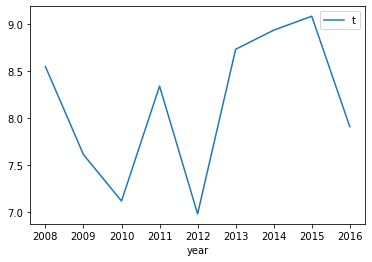

In [47]:
df.groupby('year').mean()[['t']].plot()